Saved bigs_results/bigs_scalability_time_linear.png
Time scaling exponents (slope in linear):
  encode_time_s (normal): slope = 0.00
  search_time_s (normal): slope = 0.10
  total_time_s (normal): slope = 0.10
  encode_time_s (hnsw): slope = 0.00
  search_time_s (hnsw): slope = 0.00
  total_time_s (hnsw): slope = 0.00
Memory scaling exponents (slope in linear):
  encode_mem_delta_mb (normal): slope = -0.00
  search_mem_delta_mb (normal): slope = 0.01
  encode_mem_delta_mb (hnsw): slope = 0.01
  search_mem_delta_mb (hnsw): slope = 0.01


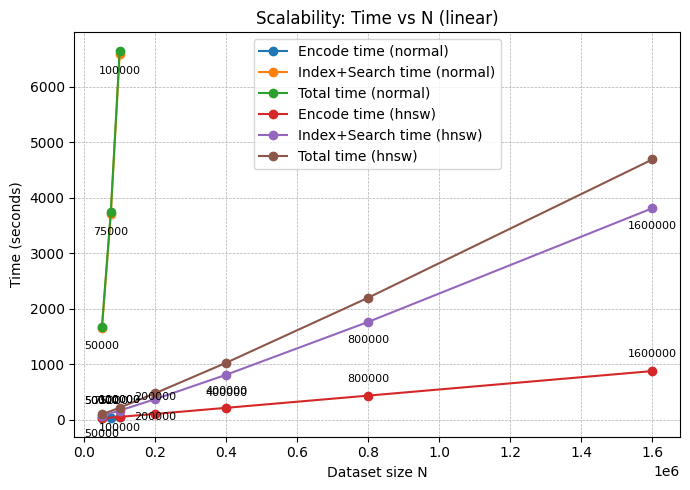

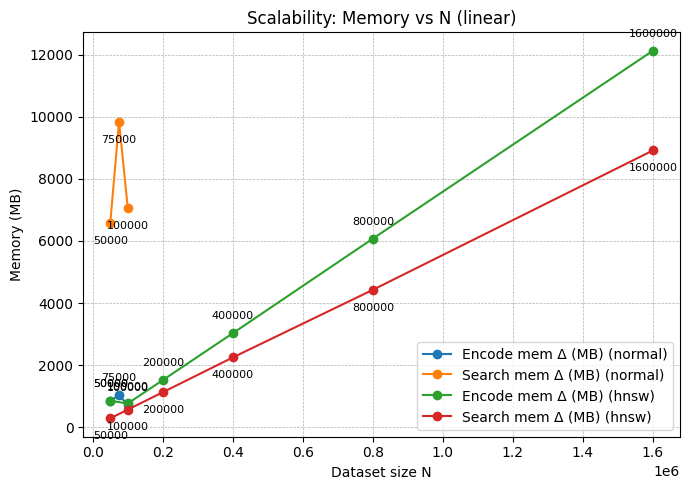

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Path to your CSV (same one you wrote in run_experiments)
csv_path = Path("bigs_results/bigs_normal.csv")
csv2_path = Path("bigs_results/bigs_normal_exp.csv")
df = pd.read_csv(csv_path)
df = df.sort_values("samples")
df["method"] = "normal"
df2 = pd.read_csv(csv2_path)
df2 = df2.sort_values("samples")
df2["method"] = "hnsw"

df = pd.concat([df, df2], ignore_index=True)

N = df["samples"].to_numpy()

# ---------- helper: fit slope (scaling exponent) ----------
def lin_slope(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    m = (x > 0) & (y > 0)
    if m.sum() < 2:
        return np.nan
    return np.polyfit(x[m], y[m], 1)[0]

# ---------- 1) TIME PLOT (linear, by method) ----------
plt.figure(figsize=(7,5))
for method in df['method'].unique():
    d = df[df['method'] == method]
    N_m = d['samples'].to_numpy()
    plt.plot(N_m, d['encode_time_s'], 'o-', label=f"Encode time ({method})")
    plt.plot(N_m, d['search_time_s'], 'o-', label=f"Index+Search time ({method})")
    plt.plot(N_m, d['total_time_s'],  'o-', label=f"Total time ({method})")
    # Add text annotations for N
    for i, txt in enumerate(N_m):
        plt.annotate(txt, (N_m[i], d["encode_time_s"].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
        plt.annotate(txt, (N_m[i], d["search_time_s"].iloc[i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)

plt.xlabel("Dataset size N")
plt.ylabel("Time (seconds)")
plt.title("Scalability: Time vs N (linear)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# (optional) save
out_png_time = csv_path.with_name("bigs_scalability_time_linear.png")
#plt.savefig(out_png_time, dpi=160)
print(f"Saved {out_png_time}")

# Show rough scaling exponents (slope in linear)
print("Time scaling exponents (slope in linear):")
for method in df['method'].unique():
    d = df[df['method'] == method]
    N_m = d['samples'].to_numpy()
    for col in ["encode_time_s", "search_time_s", "total_time_s"]:
        s = lin_slope(N_m, d[col])
        print(f"  {col} ({method}): slope = {s:.2f}")

# ---------- 2) MEMORY PLOT (linear, by method) ----------
plt.figure(figsize=(7,5))
for method in df['method'].unique():
    d = df[df['method'] == method]
    N_m = d['samples'].to_numpy()
    plt.plot(N_m, d['encode_mem_delta_mb'], 'o-', label=f"Encode mem Δ (MB) ({method})")
    plt.plot(N_m, d['search_mem_delta_mb'], 'o-', label=f"Search mem Δ (MB) ({method})")
    # Add text annotations for N
    for i, txt in enumerate(N_m):
        plt.annotate(txt, (N_m[i], d["encode_mem_delta_mb"].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
        plt.annotate(txt, (N_m[i], d["search_mem_delta_mb"].iloc[i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)

plt.xlabel("Dataset size N")
plt.ylabel("Memory (MB)")
plt.title("Scalability: Memory vs N (linear)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# out_png_mem = csv_path.with_name("bigs_scalability_memory_linear.png")
#plt.savefig(out_png_mem, dpi=160)
# print(f"Saved {out_png_mem}")

print("Memory scaling exponents (slope in linear):")
for method in df['method'].unique():
    d = df[df['method'] == method]
    N_m = d['samples'].to_numpy()
    for col in ["encode_mem_delta_mb", "search_mem_delta_mb"]:
        s = lin_slope(N_m, d[col])
        print(f"  {col} ({method}): slope = {s:.2f}")

Saved bigs_results/bigs_total_time_linear.png
Saved bigs_results/bigs_total_time_loglog.png


/tmp/ipykernel_1981983/1602827690.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 9000))


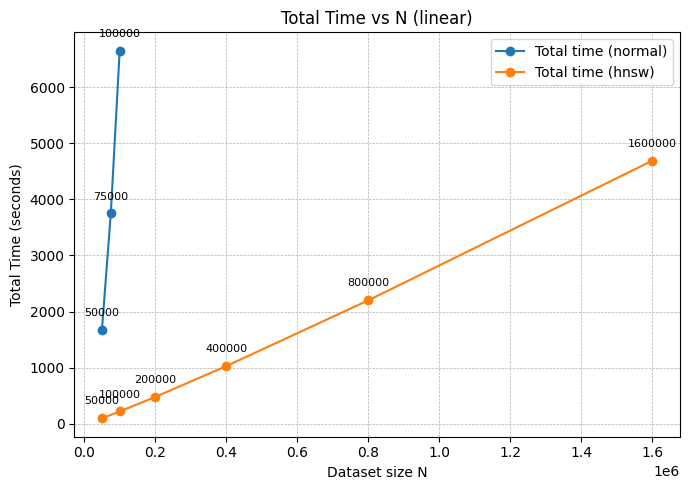

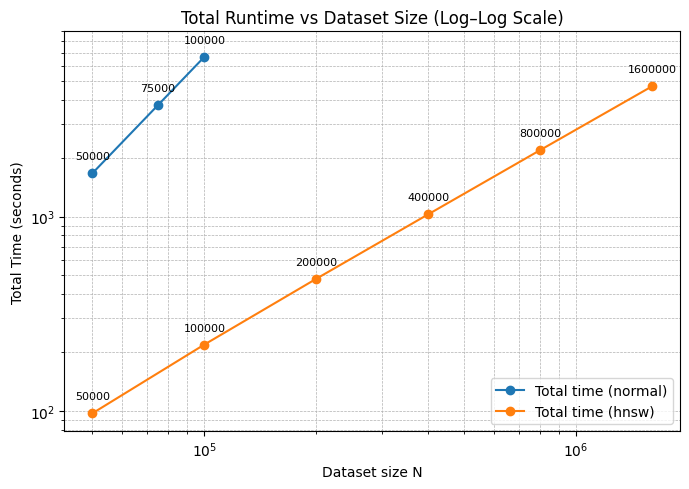

In [2]:
# ---------- 3) TOTAL TIME ONLY (linear, by method) ----------
plt.figure(figsize=(7,5))
for method in df['method'].unique():
    d = df[df['method'] == method]
    N_m = d['samples'].to_numpy()
    plt.plot(N_m, d['total_time_s'], 'o-', label=f"Total time ({method})")
    for i, txt in enumerate(N_m):
        plt.annotate(txt, (N_m[i], d["total_time_s"].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.xlabel("Dataset size N")
plt.ylabel("Total Time (seconds)")
plt.title("Total Time vs N (linear)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

out_png_total_time = csv_path.with_name("bigs_total_time_linear.png")
#plt.savefig(out_png_total_time, dpi=160)
print(f"Saved {out_png_total_time}")

# ---------- 4) TOTAL TIME ONLY (log-log, by method) ----------
plt.figure(figsize=(7,5))
for method in df['method'].unique():
    d = df[df['method'] == method]
    N_m = d['samples'].to_numpy()
    plt.loglog(N_m, d['total_time_s'], 'o-', label=f"Total time ({method})")
    for i, txt in enumerate(N_m):
        plt.annotate(txt, (N_m[i], d["total_time_s"].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.xlabel("Dataset size N")
plt.ylabel("Total Time (seconds)")
plt.title("Total Runtime vs Dataset Size (Log–Log Scale)")
plt.ylim((0, 9000))
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

out_png_total_time_log = csv_path.with_name("bigs_total_time_loglog.png")
#plt.savefig(out_png_total_time_log, dpi=160)
print(f"Saved {out_png_total_time_log}")

Saved bigs_results/bigs_hnsw_components.png
Time scaling exponents (slope in linear):
  encode_time_s (hnsw): slope = 0.00
  search_time_s (hnsw): slope = 0.00
  total_time_s (hnsw): slope = 0.00


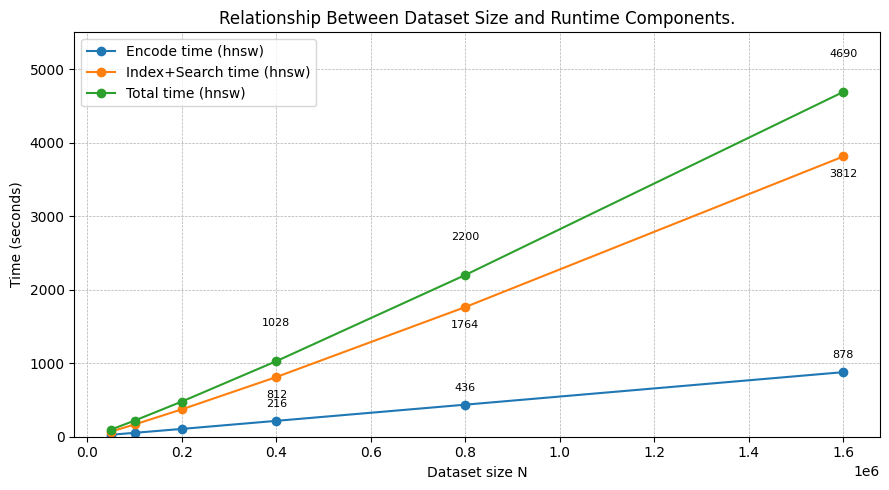

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Path to your CSV (same one you wrote in run_experiments)
df = pd.read_csv(csv2_path)
df = df.sort_values("samples")
df["method"] = "hnsw"

N = df["samples"].to_numpy()

# ---------- helper: fit slope (scaling exponent) ----------
def lin_slope(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    m = (x > 0) & (y > 0)
    if m.sum() < 2:
        return np.nan
    return np.polyfit(x[m], y[m], 1)[0]

# ---------- 1) TIME PLOT (linear, by method) ----------
plt.figure(figsize=(9,5))
for method in df['method'].unique():
    d = df[df['method'] == method]
    N_m = d['samples'].to_numpy()
    plt.plot(N_m, d['encode_time_s'], 'o-', label=f"Encode time ({method})")
    plt.plot(N_m, d['search_time_s'], 'o-', label=f"Index+Search time ({method})")
    plt.plot(N_m, d['total_time_s'],  'o-', label=f"Total time ({method})")
    # Add text annotations for N
    for i, txt in enumerate(N_m):
        # plt.annotate(txt, (N_m[i], d["encode_time_s"].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
        # plt.annotate(txt, (N_m[i], d["search_time_s"].iloc[i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)
        if i > 2:
            plt.annotate(f"{d['encode_time_s'].iloc[i]:.0f}", (N_m[i], d["encode_time_s"].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
            plt.annotate(f"{d['search_time_s'].iloc[i]:.0f}", (N_m[i], d["search_time_s"].iloc[i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)
            plt.annotate(f"{d['total_time_s'].iloc[i]:.0f}", (N_m[i], d["total_time_s"].iloc[i]), textcoords="offset points", xytext=(0,25), ha='center', fontsize=8)

plt.xlabel("Dataset size N")
plt.ylabel("Time (seconds)")
plt.title("Relationship Between Dataset Size and Runtime Components.")
plt.ylim(0, 5500)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# (optional) save
out_png_time = csv_path.with_name("bigs_hnsw_components.png")
plt.savefig(out_png_time, dpi=160)
print(f"Saved {out_png_time}")

# Show rough scaling exponents (slope in linear)
print("Time scaling exponents (slope in linear):")
for method in df['method'].unique():
    d = df[df['method'] == method]
    N_m = d['samples'].to_numpy()
    for col in ["encode_time_s", "search_time_s", "total_time_s"]:
        s = lin_slope(N_m, d[col])
        print(f"  {col} ({method}): slope = {s:.2f}")

